In [1]:
#import
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
import pandas as pd

#adatimport
ind=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\szószok\\Indonesia\\veg\\ind_final.xlsx", index_col="Unnamed: 0")
sg=pd.read_excel("C:\\Users\Andris\\Documents\\Szakdoga\\szószok\\Singapore (idk, kell-e)\\sg_final.xlsx", index_col="Unnamed: 0")
mal=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\szószok\\Indonesia\\veg\\mal_final.xlsx", index_col="Unnamed: 0")
thai=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\szószok\\Thailand\\Thai.xlsx", index_col="Unnamed: 0")
def one(df):
    df.index = df.index.map(lambda x: x.replace(day=1))
    return df

thai=one(thai)

In [5]:
ran= (ind.index> '2007-12-31') & (ind.index <= '2024-10-01')
ind=ind[ran]
ran= (sg.index> '2007-12-31') & (sg.index <= '2024-10-01')
sg=sg[ran]
ran= (mal.index> '2007-12-31') & (mal.index <= '2024-10-01')
mal=mal[ran]
ran= (thai.index> '2007-12-31') & (thai.index <= '2024-01-01')
thai=thai[ran]

indc=[]
sgc=[]
malc=[]
tha=[]
for x in ind.columns:
    indc.append("Indonesia: "+x)
for y in sg.columns:
    sgc.append("Singapore: "+y)
for z in mal.columns:
    malc.append("Malaysia: "+z)

for x in thai.columns:
    tha.append("Thailand: "+x)
ind.columns=indc
sg.columns=sgc
mal.columns=malc
thai.columns=tha
merged=pd.concat([ind, sg, mal, thai], axis=0)
for x in merged.columns:
    if x=="Unnamed: 0":
        merged.drop(columns=x, inplace=True)


In [29]:
merged

,Indonesia: ACEH Gross Regional Domestic Product (linear),"Indonesia: SUMATERA UTARA A Agriculture, Forestry and Fishing (linear)",Indonesia: SUMATERA UTARA Gross Regional Domestic Product (linear),"Indonesia: SUMATERA BARAT A Agriculture, Forestry and Fishing (linear)",Indonesia: SUMATERA BARAT Gross Regional Domestic Product (linear),"Indonesia: RIAU A Agriculture, Forestry and Fishing (linear)",Indonesia: RIAU Gross Regional Domestic Product (linear),"Indonesia: JAMBI A Agriculture, Forestry and Fishing (linear)",Indonesia: JAMBI Gross Regional Domestic Product (linear),"Indonesia: SUMATERA SELATAN A Agriculture, Forestry and Fishing (linear)",...,Thailand: GDP growth (annual %).1,Thailand: Exports of goods and services (% of GDP).1,Thailand: Imports of goods and services (% of GDP).1,"Thailand: Revenue, excluding grants (% of GDP).1",Thailand: Domestic credit provided by financial sector (% of GDP).1,Thailand: Merchandise trade (% of GDP).1,Thailand: Net barter terms of trade index (2015 = 100).1,"Thailand: External debt stocks, total (DOD, current US$).1","Thailand: Total debt service (% of exports of goods, services and primary income).1",Thailand: Political Stability and Absence of Violence/Terrorism: Estimate.1
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.076664,65.418295,64.972561,17.228866,197.167587,113.934641,101.657683,1.920780e+11,12.907743,-0.318085
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.028997,65.425134,64.661337,17.228866,197.305971,113.343233,101.657683,1.920780e+11,12.907743,-0.308794
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.979741,65.432200,64.339738,17.228866,197.448966,112.732112,101.657683,1.920780e+11,12.907743,-0.299194
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.932074,65.439039,64.028514,17.228866,197.587350,112.140704,101.657683,1.920780e+11,12.907743,-0.289903


In [6]:

import warnings
warnings.filterwarnings('ignore')
from08 = [x for x in merged.columns if merged[x].first_valid_index() is not None and merged[x].first_valid_index() == pd.Timestamp('2008-01-01')]
df2=merged
for x in from08:
    merged[f'{x}_lag_24_months'] = merged[x].shift(24)
ran= (merged.index>= '2010-02-28') & (merged.index <= '2024-09-01')
merged=merged[ran]


df=merged
df2=pd.DataFrame(df, columns=df.columns)
l=[]
for x in df2.columns:
    if "_lag_24_months" in x:
        l.append(x)
for x in l:
    df2.drop(columns=x, inplace=True)

df

,Indonesia: ACEH Gross Regional Domestic Product (linear),"Indonesia: SUMATERA UTARA A Agriculture, Forestry and Fishing (linear)",Indonesia: SUMATERA UTARA Gross Regional Domestic Product (linear),"Indonesia: SUMATERA BARAT A Agriculture, Forestry and Fishing (linear)",Indonesia: SUMATERA BARAT Gross Regional Domestic Product (linear),"Indonesia: RIAU A Agriculture, Forestry and Fishing (linear)",Indonesia: RIAU Gross Regional Domestic Product (linear),"Indonesia: JAMBI A Agriculture, Forestry and Fishing (linear)",Indonesia: JAMBI Gross Regional Domestic Product (linear),"Indonesia: SUMATERA SELATAN A Agriculture, Forestry and Fishing (linear)",...,Malaysia: Aquaculture (time)_lag_24_months,Malaysia: Fishing sector (time)_lag_24_months,Malaysia: Inland waters fishing (time)_lag_24_months,"Malaysia: Marine fishing, nei (time)_lag_24_months",Malaysia: poverty_absolute (linear).2_lag_24_months,Malaysia: poverty_hardcore (linear).2_lag_24_months,Malaysia: poverty_relative (linear).2_lag_24_months,Malaysia: poverty_absolute (time).2_lag_24_months,Malaysia: poverty_hardcore (time).2_lag_24_months,Malaysia: poverty_relative (time).2_lag_24_months
2010-03-01,24664.553537,20659.427555,77932.335580,6601.670706,24792.806444,18860.067788,86238.486558,5907.393422,22726.955210,8673.414242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,24819.274436,20360.551209,78516.457987,6689.058636,25096.490487,20315.789572,89298.730083,5933.904316,23024.704382,8991.496301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,24973.995335,20061.674864,79100.580393,6776.446566,25400.174530,21771.511357,92358.973608,5960.415211,23322.453554,9309.578361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01,25128.716234,19762.798518,79684.702799,6863.834496,25703.858573,23227.233141,95419.217133,5986.926105,23620.202726,9627.660421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,25313.155720,20559.939364,81441.341490,6867.106472,26075.468431,23873.243681,97294.353922,5838.147465,22971.051809,10019.067862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:

l1=[]
l2=[]
for x, y in zip(df.columns, df.iloc[4]):
    if y==0 or str(y)=="nan" or str(y)=="NaN" or str(y)=="na":
        l1.append(x)
        l2.append(y)
for x in l1:
    df.drop(columns=x, inplace=True)

df2


,Indonesia: ACEH Gross Regional Domestic Product (linear),"Indonesia: SUMATERA UTARA A Agriculture, Forestry and Fishing (linear)",Indonesia: SUMATERA UTARA Gross Regional Domestic Product (linear),"Indonesia: SUMATERA BARAT A Agriculture, Forestry and Fishing (linear)",Indonesia: SUMATERA BARAT Gross Regional Domestic Product (linear),"Indonesia: RIAU A Agriculture, Forestry and Fishing (linear)",Indonesia: RIAU Gross Regional Domestic Product (linear),"Indonesia: JAMBI A Agriculture, Forestry and Fishing (linear)",Indonesia: JAMBI Gross Regional Domestic Product (linear),"Indonesia: SUMATERA SELATAN A Agriculture, Forestry and Fishing (linear)",...,Thailand: GDP growth (annual %).1,Thailand: Exports of goods and services (% of GDP).1,Thailand: Imports of goods and services (% of GDP).1,"Thailand: Revenue, excluding grants (% of GDP).1",Thailand: Domestic credit provided by financial sector (% of GDP).1,Thailand: Merchandise trade (% of GDP).1,Thailand: Net barter terms of trade index (2015 = 100).1,"Thailand: External debt stocks, total (DOD, current US$).1","Thailand: Total debt service (% of exports of goods, services and primary income).1",Thailand: Political Stability and Absence of Violence/Terrorism: Estimate.1
2010-03-01,24664.553537,20659.427555,77932.335580,6601.670706,24792.806444,18860.067788,86238.486558,5907.393422,22726.955210,8673.414242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,24819.274436,20360.551209,78516.457987,6689.058636,25096.490487,20315.789572,89298.730083,5933.904316,23024.704382,8991.496301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,24973.995335,20061.674864,79100.580393,6776.446566,25400.174530,21771.511357,92358.973608,5960.415211,23322.453554,9309.578361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01,25128.716234,19762.798518,79684.702799,6863.834496,25703.858573,23227.233141,95419.217133,5986.926105,23620.202726,9627.660421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,25313.155720,20559.939364,81441.341490,6867.106472,26075.468431,23873.243681,97294.353922,5838.147465,22971.051809,10019.067862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.076664,65.418295,64.972561,17.228866,197.167587,113.934641,101.657683,1.920780e+11,12.907743,-0.318085
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.028997,65.425134,64.661337,17.228866,197.305971,113.343233,101.657683,1.920780e+11,12.907743,-0.308794
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.979741,65.432200,64.339738,17.228866,197.448966,112.732112,101.657683,1.920780e+11,12.907743,-0.299194
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.932074,65.439039,64.028514,17.228866,197.587350,112.140704,101.657683,1.920780e+11,12.907743,-0.289903


In [15]:
#arima
from pmdarima.arima.utils import ndiffs
#stacionáriussá tenni
def alakit(df):
    dff = pd.DataFrame()
    

    for x in df.columns:


        a = df[x]
        f = ndiffs(a, test='adf')
        
        for _ in range(f):
            a = a.diff().fillna(0) 
            
        dff[x] = a  
    return dff

#dfff = alakit(df)
dfp=df.isnull().any()
i=0
for x in dfp:
    if x==False:
        i=i+1
print(i)


201


In [7]:
l=[]
iss=[]
for y, x in zip(df.index, df[df.columns[3]]):
    dfa=pd.DataFrame()
    if not pd.isna(x):
        l.append(x)
        iss.append(y)
    else:
        break
dfa.index=iss
dfa[str(x)]=l
dfa

,nan
2010-03-01,6601.670706
2010-04-01,6689.058636
2010-05-01,6776.446566
2010-06-01,6863.834496
2010-07-01,6867.106472
...,...
2024-05-01,17367.179538
2024-06-01,17500.676134
2024-07-01,17606.873862
2024-08-01,17713.071589


In [8]:
#oké, szóval: új oszlopok, amiknek utolsó értéke kivonva a 2025 januárból közti időszak arimázva van
dfsok=pd.DataFrame()
iutsok=[]
for x in df.columns:
    iss=[]
    l=[]
    
    for y, x in zip(df.index, df[x]):
        dfa=pd.DataFrame()
        if not pd.isna(x):
            l.append(x)
            iss.append(y)
            iutso=y
            
        else:
            
            break
    iutsok.append(iutso)
    dfa.index=iss
    dfa[x]=l
    a=dfa[x]
    f = ndiffs(a, test='adf')
        
    for _ in range(f):
        a = a.diff().fillna(0)    
    dfa[x] = a

    dfsok=pd.concat([dfsok, dfa], axis=1)



In [9]:
dfsok.columns=df.columns

In [10]:
dfsok

,Indonesia: ACEH Gross Regional Domestic Product (linear),"Indonesia: SUMATERA UTARA A Agriculture, Forestry and Fishing (linear)",Indonesia: SUMATERA UTARA Gross Regional Domestic Product (linear),"Indonesia: SUMATERA BARAT A Agriculture, Forestry and Fishing (linear)",Indonesia: SUMATERA BARAT Gross Regional Domestic Product (linear),"Indonesia: RIAU A Agriculture, Forestry and Fishing (linear)",Indonesia: RIAU Gross Regional Domestic Product (linear),"Indonesia: JAMBI A Agriculture, Forestry and Fishing (linear)",Indonesia: JAMBI Gross Regional Domestic Product (linear),"Indonesia: SUMATERA SELATAN A Agriculture, Forestry and Fishing (linear)",...,Indonesia: Linear interpolation: Adjusted net national income (current US$)_lag_24_months,Indonesia: Linear interpolation: Adjusted net national income per capita (current US$)_lag_24_months,Indonesia: real_gdp_ind_seas_adj (linear)_lag_24_months,Indonesia: real_gdp_ind_seas_adj (time)_lag_24_months,Indonesia: nominal_gdp_ind_seas_adj (linear)_lag_24_months,Indonesia: nominal_gdp_ind_seas_adj (time)_lag_24_months,Indonesia: real_gdp_ind_non_seas_adj (linear)_lag_24_months,Indonesia: real_gdp_ind_non_seas_adj (time)_lag_24_months,Indonesia: nominal_gdp_ind_non_seas_adj (linear)_lag_24_months,Indonesia: nominal_gdp_ind_non_seas_adj (time)_lag_24_months
2010-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8673.414242,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-04-01,154.720899,-298.876346,584.122406,87.387930,303.684043,1455.721784,3060.243525,26.510894,297.749172,8991.496301,...,4.687716e+09,1.828110e+01,7351.625000,7351.625000,22825.166667,22825.166667,20361.291667,20361.291667,41875.958333,41875.958333
2010-05-01,154.720899,-298.876346,584.122406,87.387930,303.684043,1455.721784,3060.243525,26.510894,297.749172,9309.578361,...,0.000000e+00,2.273737e-13,6790.166667,6863.972826,22721.041667,22968.009511,23101.333333,23352.434783,42669.541667,43133.341033
2010-06-01,154.720899,-298.876346,584.122406,87.387930,303.684043,1455.721784,3060.243525,26.510894,297.749172,9627.660421,...,1.220703e-04,0.000000e+00,6790.166667,6642.554348,22721.041667,22227.105978,23101.333333,22599.130435,42669.541667,41741.942935
2010-07-01,184.439486,797.140846,1756.638690,3.271975,371.609859,646.010540,1875.136790,-148.778640,-649.150917,10019.067862,...,6.103516e-05,1.136868e-12,6790.166667,6863.972826,22721.041667,22968.009511,23101.333333,23352.434783,42669.541667,43133.341033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,606.182755,1280.964745,3943.417638,133.496596,860.010068,1443.736276,3277.086235,935.352164,2205.044989,22721.589266,...,0.000000e+00,0.000000e+00,11084.666667,11205.152174,39321.500000,39748.907609,17827.833333,18021.614130,56324.833333,56937.059783
2024-06-01,606.182755,1280.964745,3943.417638,133.496596,860.010068,1443.736276,3277.086235,935.352164,2205.044989,23217.945000,...,0.000000e+00,0.000000e+00,11084.666667,10843.695652,39321.500000,38466.684783,17827.833333,17440.271739,56324.833333,55100.380435
2024-07-01,548.752800,649.335558,2360.130305,106.197728,76.666319,2094.325357,3622.252927,214.115267,615.647846,23443.279705,...,0.000000e+00,0.000000e+00,11084.666667,11205.152174,39321.500000,39748.907609,17827.833333,18021.614130,56324.833333,56937.059783
2024-08-01,548.752800,649.335558,2360.130305,106.197728,76.666319,2094.325357,3622.252927,214.115267,615.647846,23668.614410,...,0.000000e+00,0.000000e+00,12443.583333,12578.839674,37180.333333,37584.467391,3541.333333,3579.826087,15969.166667,16142.744565


In [13]:
#arima forecast
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima


def arima(dfsok):
    dfsok2=pd.DataFrame()
    for x, y in zip(dfsok.columns, iutsok):
        index=dfsok.index
        index2=pd.date_range(start=dfsok.index[-1]+pd.Timedelta(days=1), end='2026-02-01', freq='M')
        index3 = dfsok.index.append(index2)
        lista= dfsok[x].dropna().tolist()
        d1=str(y).replace(" 00:00:00","")
        print(d1)
        d2="2026-01-01"
        date1=datetime.strptime(d1, "%Y-%m-%d")
        date2=datetime.strptime(d2, "%Y-%m-%d")
        diff=relativedelta(date2, date1)
        md=diff.years*12+diff.months
        
        #arima
        auto_model = auto_arima(lista, seasonal=True, trace=False, error_action='ignore', suppress_warnings=True)
        p, d, q = auto_model.order

        model = ARIMA(lista, order=(p, d, q))
        model_fit = model.fit()
        pred=model_fit.forecast(steps=md)
        i2 = index3[len(lista):len(lista) + md] 
        i1 = index3[:len(lista)]
        d=pd.DataFrame()
        d.index=i2
        d[x]=pred
        d1=pd.DataFrame()
        d1.index=i1
        d1[x]=lista
        dff=pd.concat([d1, d], axis=0)
        dfsok2=pd.concat([dfsok2, dff], axis=1)
    return dfsok2

dfsok=dfsok.iloc[1:]
    
#a=arima(dfsok)



    

In [ ]:
a.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\arima2025ig.xlsx")

In [ ]:
#klassz modellek
"""
ss_df_corr logreg+rfe 0.2 thai
mm_df2_pca svm linear thai
ss_df2 logreg+rfe 0.2
"""
#sima modellek
#rfelinreg 70-30, robust1
#ridge1 mm_ae, 70-30, 2


In [2]:
a=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\arima2025ig.xlsx")
a.index=a["Unnamed: 0"]
a.drop(columns="Unnamed: 0", inplace=True)
a=a.iloc[1:]
for x in a.columns:
    if "Linear" in x or "linear" in x:
        a.drop(columns=x, inplace=True)

In [7]:
#scaling
import sklearn.preprocessing

df=pd.DataFrame(a)
df2=pd.DataFrame(a)
for x in df2.columns:
    if x in from08:
        df2.drop(columns=x, inplace=True)
scaler = sklearn.preprocessing.RobustScaler()
robust_df = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns, index=df.index)
robust_df2 = pd.DataFrame(scaler.fit_transform(df2.to_numpy()), columns=df2.columns, index=df2.index)


scaler = sklearn.preprocessing.MinMaxScaler()
mm_df = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns, index=df.index)

mm_df2 = pd.DataFrame(scaler.fit_transform(df2.to_numpy()), columns=df2.columns, index=df2.index)


scaler = sklearn.preprocessing.StandardScaler()
ss_df = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns, index=df.index)

ss_df2 = pd.DataFrame(scaler.fit_transform(df2.to_numpy()), columns=df2.columns, index=df2.index)


In [ ]:
#export

ss_df.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\ss_df.xlsx")
ss_df2.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\ss_df2.xlsx")
mm_df.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\mm_df.xlsx")
mm_df2.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\mm_df2.xlsx")
robust_df.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\robust_df.xlsx")
robust_df2.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\robust_df2.xlsx")


In [19]:
#import 2
import pandas as pd
import os
from openpyxl import load_workbook
import numpy as np
import re

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import sklearn.feature_selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.base import clone
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



In [16]:
#incidents
incc=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\szószok\\aaaaa.xlsx")
incc.head()
k=pd.DataFrame()
k.index=pd.to_datetime(incc.otket)
k.index
k=k.resample('M').size()
k=pd.DataFrame(k)
k=one(k)
dfsok=pd.DataFrame()
iutsok=[]
for x in k.columns:
    iss=[]
    l=[]
    
    for y, x in zip(k.index, k[x]):
        dfa=pd.DataFrame()
        if not pd.isna(x):
            l.append(x)
            iss.append(y)
            iutso=y
            
        else:
            
            break
    iutsok.append(iutso)
    dfa.index=iss
    dfa[x]=l
    a=dfa[x]
    f = ndiffs(a, test='adf')
        
    for _ in range(f):
        a = a.diff().fillna(0)    
    dfa[x] = a

    k=pd.concat([dfsok, dfa], axis=1)

k=arima(k)

2024-09-01


In [28]:
incc=pd.read_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\szószok\\aaaaa.xlsx")
k=pd.DataFrame()
k.index=pd.to_datetime(incc.otket)
k.index
k=k.resample('M').size()
k=pd.DataFrame(k)
k=k.iloc[3:]
k=one(k)
for x in k.columns:
    iss=[]
    l=[]
    
    for y, x in zip(k.index, k[x]):
        dfa=pd.DataFrame()
        if not pd.isna(x):
            l.append(x)
            iss.append(y)
            iutso=y
            
        else:
            
            break
    iutsok.append(iutso)
    dfa.index=iss
    dfa[x]=l
    a=dfa[x]
    f = ndiffs(a, test='adf')
        
    for _ in range(f):
        a = a.diff().fillna(0)    
    dfa[x] = a

    k=pd.concat([dfsok, dfa], axis=1)

k=arima(k)
k.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\szószok\\aaaaa2.xlsx")
k

2024-09-01


,3
2010-04-01,0.000000
2010-05-01,1.000000
2010-06-01,1.000000
2010-07-01,-2.000000
2010-08-01,1.000000
...,...
2025-08-31,0.019849
2025-09-30,0.019849
2025-10-31,0.019849
2025-11-30,0.019849


In [17]:
k

,3
2010-01-01,0.000000
2010-02-01,-1.000000
2010-03-01,0.000000
2010-04-01,0.000000
2010-05-01,1.000000
...,...
2025-08-31,0.018976
2025-09-30,0.018976
2025-10-31,0.018976
2025-11-30,0.018976


In [20]:
#scaling k
#y scaling




incm=k.iloc[2:]
ssincm=StandardScaler().fit_transform(incm.to_numpy())
ssi=[]
for x in ssincm:
    ssi.append(float(x[0]))
    
mmincm=sklearn.preprocessing.MinMaxScaler().fit_transform(incm.to_numpy())
mmi=[]
for x in mmincm:
    mmi.append(float(x[0]))

rincm=sklearn.preprocessing.RobustScaler().fit_transform(incm.to_numpy())
ri=[]
for x in rincm:
   ri.append(float(x[0]))



def ldf(l):
    l=pd.DataFrame(l, columns=["incidents_per_month"])
    return l

ri=ldf(ri)
mmi=ldf(mmi)
ssi=ldf(ssi)




In [23]:
ssi.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\ssi.xlsx")
mmi.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\mmi.xlsx")
ri.to_excel("C:\\Users\\Andris\\Documents\\Szakdoga\\25\\ri.xlsx")

In [92]:
#szabad modellek
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE


def rfelinreg(df, inc, ts):
    #df.index=df['Unnamed: 0']
    #df.drop(columns= "Unnamed: 0", inplace=True)
    for x in df.columns:
        if x=="inc":
            df.drop(columns=x, inplace=True)

    for x in df.columns:
        if ".1" in str(x):
            df.drop(columns=x, inplace=True)

    if 'Unnamed: 0' in df.columns:
        df.index=df['Unnamed: 0']
        df.drop(columns= "Unnamed: 0", inplace=True)

    x = df
    y = inc['incidents_per_month']


    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=0)
    lr = LinearRegression()
    rfe = RFE(estimator=lr, n_features_to_select=int(len(df)/10))  
    rfe.fit(X_train, y_train)

    sel= x.columns[rfe.support_]

    X_trainsel = X_train[sel]
    X_testsel= X_test[sel]

    lr.fit(X_trainsel, y_train)
    y_pred = lr.predict(X_testsel)

    mse = mean_squared_error(y_test, y_pred)
    print(mse)

    tit=str(df.Name)
    hatar=len(X_train)
    i2=df.index
    i2=i2[hatar:]
    #plt.plot(df.index, y, label="test")
    plt.plot(i2, y_test, label="test")
    plt.plot(i2, y_pred, label="predicted")
    
    plt.title(tit)
    plt.legend()
    plt.show()


    i1=df.index[:hatar]
    trainpred=lr.predict(X_trainsel)
    plt.plot(i1, y_train, label="training")
    plt.plot(i1, trainpred, label="predicted")
    
    plt.title(tit+" train")
    plt.legend()
    plt.show()


    df2=pd.DataFrame()
    
    df2.index=i2
    df2['real']=y_test
    df2['pred']=y_pred

    dft=pd.DataFrame() 
    dft.index=i1
    dft['real']=y_train
    dft['pred']=trainpred

    print(mse)
    print(sel)

    return mse, df2

In [93]:
#lasso+es
def lassoes(df, inc, ps, rs, ts):
    for x in df.columns:
        if x=="inc":
            df.drop(columns=x, inplace=True)
    legjlegjemese=float('inf')
    for p in ps:
        for r in rs:
            if 'Unnamed: 0' in df.columns:
                df.index=df['Unnamed: 0']
                df.drop(columns= "Unnamed: 0", inplace=True)
            
       

            reg = Lasso(alpha=r, warm_start=True, max_iter=1, random_state=42) 
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=p, include_bias=False)), 
                ("regul_reg", reg)
            ]) 
            x=df
            y=inc['incidents_per_month']
            x_train, x_test, y_train, y_test = train_test_split( 
            x, y, test_size =ts, random_state = 0) 

            legjemese = float('inf')
            patience=10
            noimp = 0

            for epoch in range(1000):
                
                model.fit(x_train, y_train)

          
                pred = model.predict(x_test)
                mse = mean_squared_error(y_test, pred)


                if mse < legjemese:
                    legjemese = mse
                    noimp = 0
                else:
                    noimp += 1

                if noimp >= patience:
            
                    break

            if legjemese < legjlegjemese:
                legjlegjemese = legjemese
                bestepoch=epoch
                bestmodel=clone(model)
                legjpred=pred
                legjtrain=model.predict(x_train)
                legjp=p
                legjr=r

    tit=str(df.Name)
    hatar=len(x_train)
    i2=df.index
    i2=i2[hatar:]
    #plt.plot(df.index, y, label="test")
    plt.plot(i2, y_test, label="test")
    plt.plot(i2, legjpred, label="predicted")
    
    plt.title(tit)
    plt.legend()
    plt.show()

    i1=df.index[:hatar]
    trainpred=model.predict(x_train)
    plt.plot(i1, y_train, label="training")
    plt.plot(i1, legjtrain, label="predicted")
    
    plt.title(tit+" train")
    plt.legend()
    plt.show()
    df2=pd.DataFrame()
    
    df2.index=i2
    df2['real']=y_test
    df2['pred']=legjpred

    dft=pd.DataFrame()
  
    dft.index=i1
    dft['real']=y_train
    dft['pred']=legjtrain

    print(legjlegjemese)
    print(legjp)
    print(legjr)
    return legjlegjemese, bestepoch, bestmodel

AttributeError: 'DataFrame' object has no attribute 'Name'

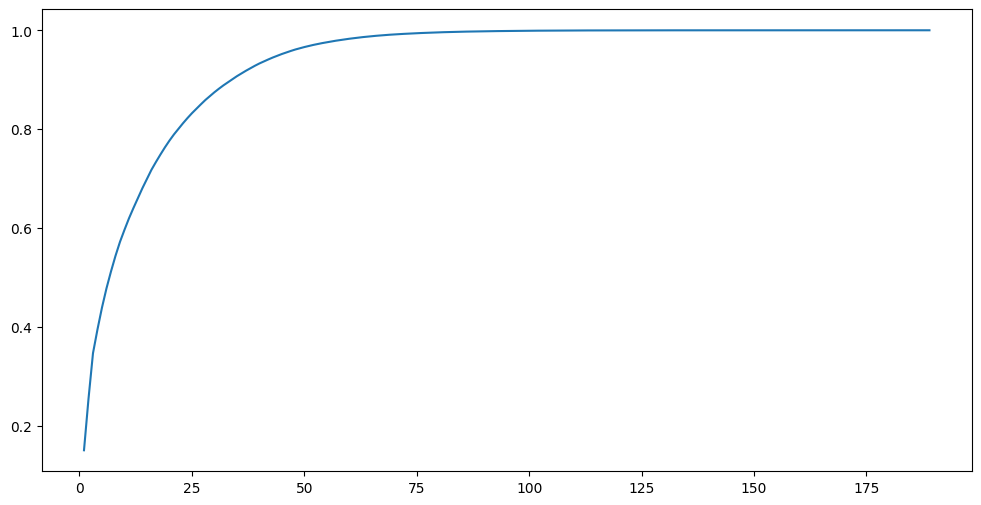

In [94]:
#pca
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def pcaa(df):
    df.dropna(inplace=True)

    l=[]
    l2=[]

    maxc = min(df.shape[0], df.shape[1])
    for x in range(1, maxc):

        pca = PCA(n_components=x)
        pca.fit(df)
        pca_data = pca.transform(df)

        l.append(x)
        l2.append(np.sum(pca.explained_variance_ratio_))


        dfa=pd.DataFrame(pca_data, index=df.index)
        dfa

    plt.figure(figsize=(12, 6))
    plt.plot(l, l2)
    plt.title(str(df.Name))
    plt.xticks(np.arange(min(l), max(l)+1, 5))
    plt.show()

ss_df_pca=pcaa(ss_df)

In [95]:
ss_df.Name="ss_df"
ss_df.dropna(inplace=True)
var_ratio =35
pca = PCA(n_components=var_ratio)
pca.fit(ss_df)
pca_data = pca.transform(ss_df)

print('n_components: ', pca.n_components_)
print('expl. var ratio: ', np.sum(pca.explained_variance_ratio_))

ss_df_pca=pd.DataFrame(pca_data, index=ss_df.index)   

n_components:  35
expl. var ratio:  0.9071419720749614


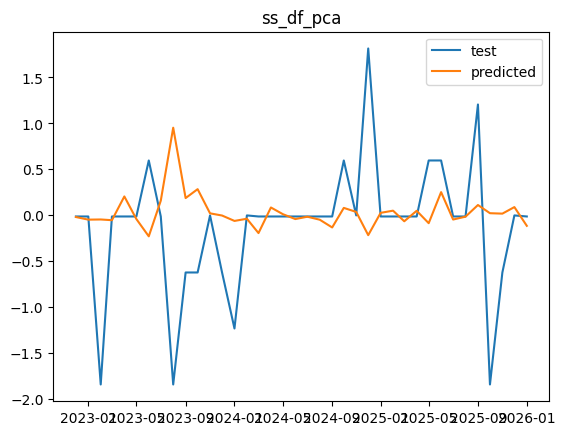

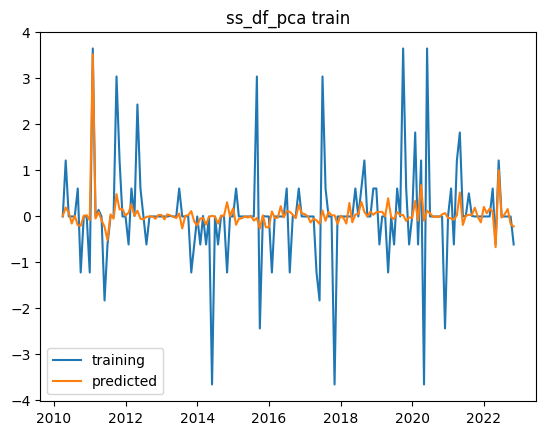

0.6032377720537342
2
1


(0.6032377720537342,
 10,
 Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                 ('regul_reg',
                  Lasso(alpha=1, max_iter=1, random_state=42, warm_start=True))]))

In [97]:
ssi=ssi.iloc[1:]
#futtatás
ps=[2, 3, 4] 
rs=[0.01, 0.1, 1]
ss_df_pca.Name="ss_df_pca"
lassoes(ss_df_pca, ssi, ps, rs, 0.2)

1.1899442118415327


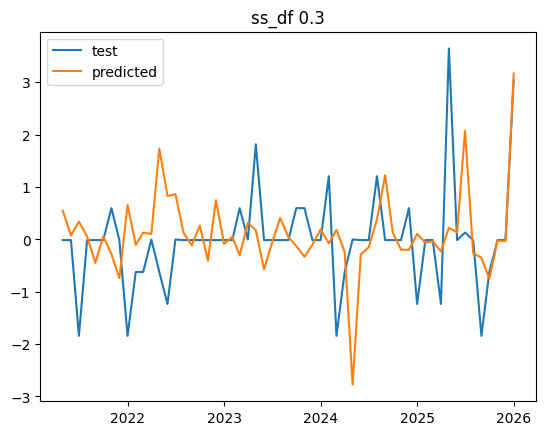

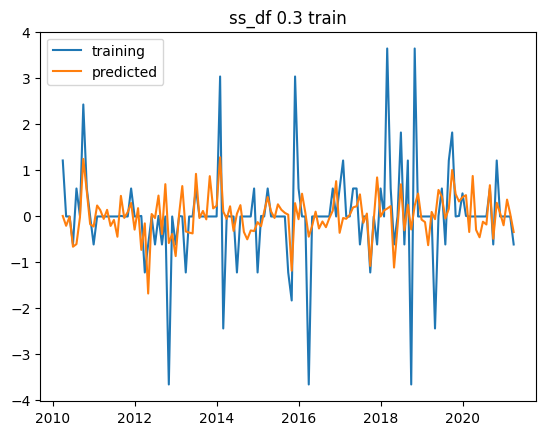

1.1899442118415327
Index(['Indonesia:  DKI JAKARTA A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  JAWA TENGAH A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  KALIMANTAN TENGAH Gross Regional Domestic Product (linear)',
       'Indonesia:  KALIMANTAN TIMUR Gross Regional Domestic Product (linear)',
       'Indonesia:  SULAWESI UTARA Gross Regional Domestic Product (linear)',
       'Indonesia:  SULAWESI SELATAN A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  SULAWESI TENGGARA A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  JAWA TENGAH A Agriculture, Forestry and Fishing (time)',
       'Indonesia:  KALIMANTAN TENGAH Gross Regional Domestic Product (time)',
       'Indonesia:  KALIMANTAN TIMUR Gross Regional Domestic Product (time)',
       'Indonesia:  SULAWESI UTARA Gross Regional Domestic Product (time)',
       'Indonesia:  SULAWESI SELATAN A Agriculture, Forestry and Fishing (time)',
       'Indonesia:  SUL

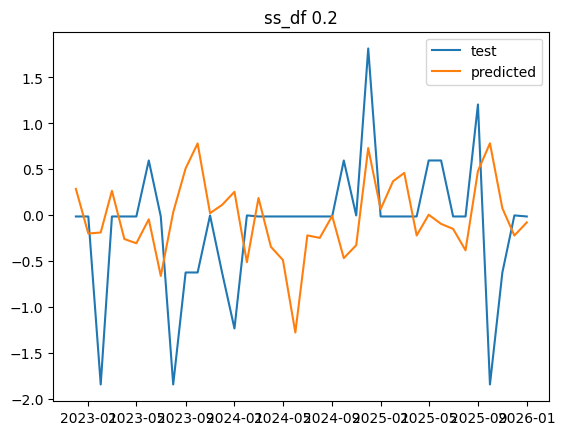

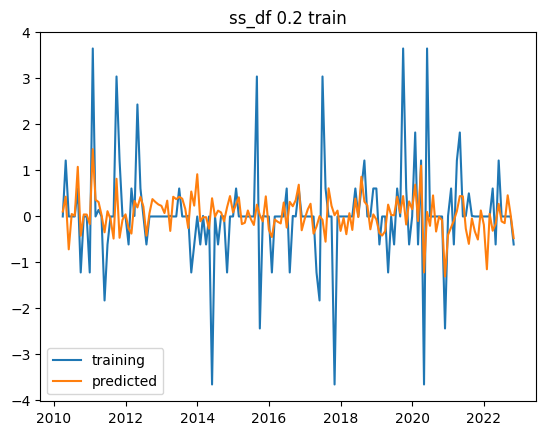

0.7250350024837793
Index(['Indonesia:  DKI JAKARTA A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  KALIMANTAN BARAT A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  KALIMANTAN SELATAN A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  PAPUA A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  KALIMANTAN BARAT A Agriculture, Forestry and Fishing (time)',
       'Indonesia:  SULAWESI SELATAN A Agriculture, Forestry and Fishing (time)',
       'Indonesia:  PAPUA A Agriculture, Forestry and Fishing (time)',
       'Indonesia: SUMATERA UTARA (linear)', 'Indonesia: RIAU (time)',
       'Indonesia: NUSA TENGGARA BARAT (time)',
       'Indonesia: Crime in KALIMANTAN BARAT (linear)',
       'Indonesia: Crime in KALIMANTAN TENGAH (linear)',
       'Indonesia: Crime in KALIMANTAN BARAT (time)',
       'Indonesia: Time interpolation: Adjusted net national income (current US$)',
       'Indonesia: Time interpolation: Adjusted net na

(0.7250350024837793,
             real      pred
 Unnamed: 0                
 2022-12-01   NaN  0.286560
 2023-01-01   NaN -0.199536
 2023-02-01   NaN -0.188032
 2023-03-01   NaN  0.265920
 2023-04-01   NaN -0.258921
 2023-05-01   NaN -0.305795
 2023-06-01   NaN -0.044272
 2023-07-01   NaN -0.661163
 2023-08-01   NaN  0.031759
 2023-09-01   NaN  0.509629
 2023-10-01   NaN  0.781456
 2023-11-01   NaN  0.022212
 2023-12-01   NaN  0.112141
 2024-01-01   NaN  0.254990
 2024-02-01   NaN -0.511799
 2024-03-01   NaN  0.187577
 2024-04-01   NaN -0.343926
 2024-05-01   NaN -0.488157
 2024-06-01   NaN -1.276958
 2024-07-01   NaN -0.219917
 2024-08-01   NaN -0.246992
 2024-09-01   NaN -0.008181
 2024-09-30   NaN -0.466990
 2024-10-31   NaN -0.326914
 2024-11-30   NaN  0.731148
 2024-12-31   NaN  0.065674
 2025-01-31   NaN  0.369376
 2025-02-28   NaN  0.460454
 2025-03-31   NaN -0.220560
 2025-04-30   NaN  0.005061
 2025-05-31   NaN -0.094775
 2025-06-30   NaN -0.148986
 2025-07-31   NaN -0.382423

In [98]:
ss_df.Name="ss_df 0.3"
rfelinreg(ss_df, ssi, 0.3)
ss_df.Name="ss_df 0.2"
rfelinreg(ss_df, ssi, 0.2)

0.7480111484455916


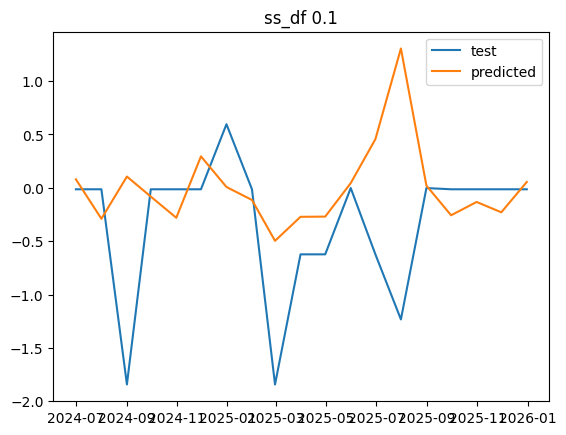

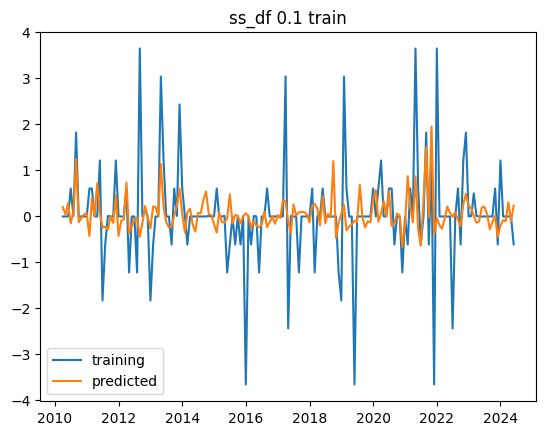

0.7480111484455916
Index(['Indonesia:  SUMATERA UTARA Gross Regional Domestic Product (linear)',
       'Indonesia:  KEPULAUAN RIAU A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  KALIMANTAN SELATAN A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  SULAWESI SELATAN A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  SULAWESI BARAT A Agriculture, Forestry and Fishing (linear)',
       'Indonesia:  MALUKU UTARA Gross Regional Domestic Product (linear)',
       'Indonesia:  PAPUA BARAT Gross Regional Domestic Product (linear)',
       'Indonesia:  SUMATERA UTARA Gross Regional Domestic Product (time)',
       'Indonesia:  KEPULAUAN RIAU A Agriculture, Forestry and Fishing (time)',
       'Indonesia:  SULAWESI BARAT A Agriculture, Forestry and Fishing (time)',
       'Indonesia:  MALUKU UTARA Gross Regional Domestic Product (time)',
       'Indonesia:  PAPUA BARAT Gross Regional Domestic Product (time)',
       'Indonesia: PAPUA (linear)',

(0.7480111484455916,
             real      pred
 Unnamed: 0                
 2024-07-01   NaN  0.079251
 2024-08-01   NaN -0.290086
 2024-09-01   NaN  0.105613
 2024-09-30   NaN -0.082116
 2024-10-31   NaN -0.280715
 2024-11-30   NaN  0.294792
 2024-12-31   NaN  0.007624
 2025-01-31   NaN -0.113846
 2025-02-28   NaN -0.496891
 2025-03-31   NaN -0.271856
 2025-04-30   NaN -0.269958
 2025-05-31   NaN  0.043862
 2025-06-30   NaN  0.455941
 2025-07-31   NaN  1.305852
 2025-08-31   NaN  0.020781
 2025-09-30   NaN -0.257411
 2025-10-31   NaN -0.132605
 2025-11-30   NaN -0.229532
 2025-12-31   NaN  0.054776)

In [99]:
ss_df.Name="ss_df 0.1"
rfelinreg(ss_df, ssi, 0.1)

In [157]:
#class
from sklearn.naive_bayes import GaussianNB

def nb(df, inc):

    inc=inc.iloc[1:]
    x = df
    y = inc['incidents_per_month']


    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    pred = gauss.predict(X_test)
    trpred=gauss.predict(X_train)
    print(accuracy_score(y_test, pred)*100)

mm_df.Name="mm_df"
#mm_df_pca=pcaa(mm_df)


In [120]:
mm_df.dropna(inplace=True)
var_ratio =28
pca = PCA(n_components=var_ratio)
pca.fit(mm_df)
pca_data = pca.transform(mm_df)

print('n_components: ', pca.n_components_)
print('expl. var ratio: ', np.sum(pca.explained_variance_ratio_))

mm_df_pca=pd.DataFrame(pca_data, index=mm_df.index)   

n_components:  28
expl. var ratio:  0.9045716223482704


In [ ]:
a=mmi.mean()
g=[]
for x in mmi:
    if x<mmi:


,incidents_per_month
0,0.500000
1,0.500000
2,0.583333
3,0.583333
4,0.333333
...,...
186,0.501581
187,0.501581
188,0.501581
189,0.501581


In [158]:
nn=nb(mm_df_pca, mmi)

ValueError: Unknown label type: (array([0.        , 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.50158137, 0.51970037, 0.56878543, 0.58333333,
       0.66666667, 0.75      , 0.83333333, 0.91666667, 1.        ]),)